In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


In [38]:
costa_rica = pd.read_csv("../final_data")
costa_rica = costa_rica.drop(columns = ["Id", "idhogar"])
costa_rica

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,avg_dis,avg_escolari,min_escolari,max_escolari,avg_behind_school,min_behind_school,max_behind_school,avg_age,min_age,max_age
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,0.0,10.00,10,10,NaN,NaN,NaN,43.0,43,43
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,0.0,12.00,12,12,NaN,NaN,NaN,67.0,67,67
2,NaN,0,8,0,1,1,0,NaN,0,0,...,1.0,11.00,11,11,NaN,NaN,NaN,92.0,92,92
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,0.0,8.25,2,11,0.5,0.0,1.0,25.0,8,38
4,130000.0,1,2,0,1,1,0,NaN,0,1,...,0.0,5.75,0,11,0.5,0.0,1.0,19.0,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,NaN,0,4,0,1,0,0,NaN,1,1,...,0.0,1.80,0,5,1.0,1.0,1.0,15.0,6,29
2969,NaN,0,3,0,0,0,0,NaN,2,2,...,0.4,3.40,0,6,0.0,0.0,0.0,19.6,2,40
2970,46500.0,0,5,0,1,1,0,NaN,1,2,...,0.0,6.00,0,11,NaN,NaN,NaN,26.8,2,46
2971,NaN,0,3,0,1,1,0,NaN,0,1,...,0.0,3.00,0,6,NaN,NaN,NaN,64.0,61,67


In [39]:
# Split data into train, validation, and test sets with 70/10/20 split
train, test = train_test_split(costa_rica, test_size=0.3, random_state = 0)
valid, test = train_test_split(test, test_size=0.1, random_state = 0)
x_train = train.drop(columns = ["Target"])
y_train = train["Target"]
x_test = test.drop(columns = ["Target"])
y_test = test["Target"]
x_valid = valid.drop(columns = ["Target"])
y_valid = valid["Target"]

In [40]:
# Use variance threshold to find most important features
threshold = 0.5
sel = VarianceThreshold(threshold)
sel.fit_transform(x_train)
selected_features = sel.get_feature_names_out(x_train.columns)
# Drop unwanted features
x_train = x_train[selected_features]
x_valid = x_valid[selected_features]
x_test = x_test[selected_features]

In [41]:
# Impute missing values
imputer = KNNImputer()
x_train_knn = pd.DataFrame(imputer.fit_transform(x_train), columns=imputer.get_feature_names_out())
x_valid = pd.DataFrame(imputer.fit_transform(x_valid), columns=imputer.get_feature_names_out())

**K-Nearest Neighbors Classifier**

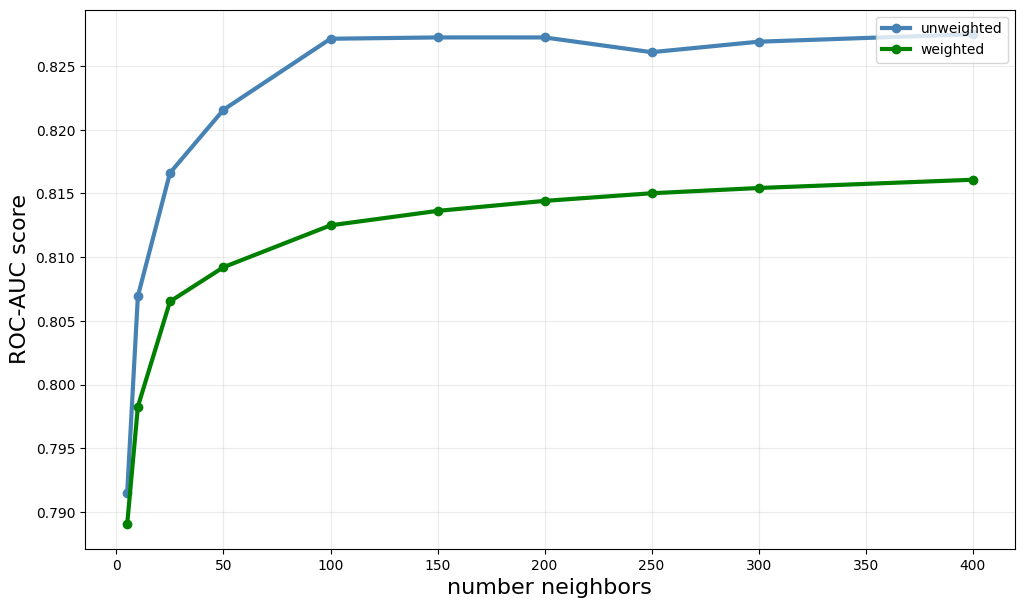

In [42]:
allks= [5,10,25,50,100,150,200,250,300, 400]
uw_scores = []
w_scores = []

# Unweighted
for k in allks:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_knn, y_train)
    y_pred = knn.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    uw_scores.append(score)

# Weighted
for k in allks:
    knn = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    knn.fit(x_train_knn, y_train)
    y_pred = knn.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    w_scores.append(score)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 7))
ax.plot(allks, uw_scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.plot(allks, w_scores, marker="o", color="green", lw=3, label="weighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("ROC-AUC score", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(0, 401, 50))
ax.grid(alpha=0.25)

In [43]:
print(uw_scores)
print(w_scores)

[0.7914811371405236, 0.8069334664170829, 0.8166108005132638, 0.8215687920680427, 0.827141414958033, 0.8272448036185512, 0.8272437671407515, 0.8260870579163064, 0.8269095030503542, 0.8274964086044242]
[0.7890378998472232, 0.7982677346533914, 0.8065201708944596, 0.8092119037402337, 0.812497020126326, 0.8136298903613783, 0.8144150222946375, 0.8150141064628537, 0.8154255881493274, 0.8160744232519284]


**Decision Tree**

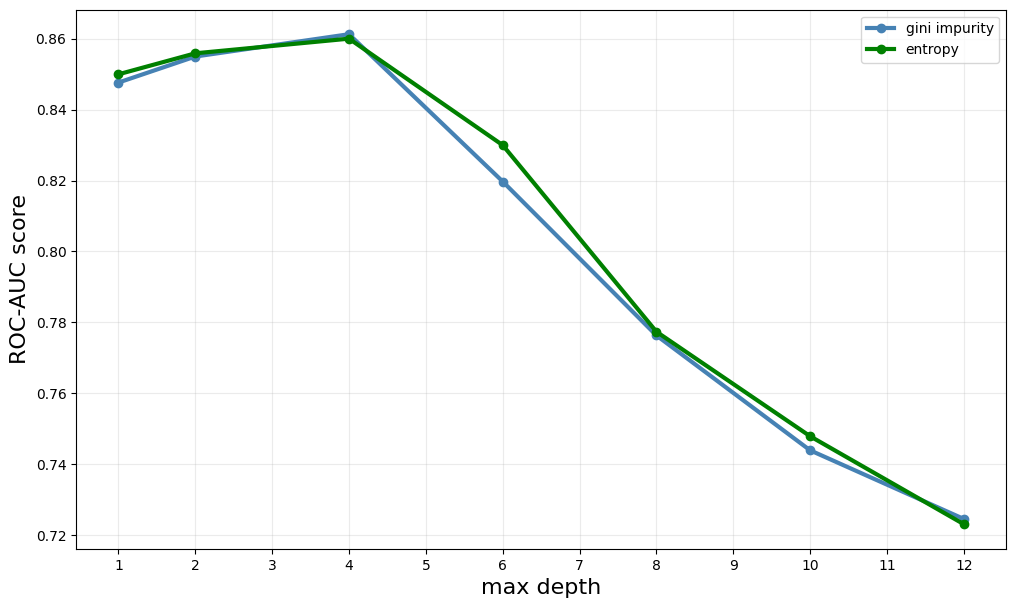

In [44]:
max_depths = [1,2, 4, 6, 8, 10, 12]
gini_score = []
entropy_score = []
gini_trees = {}
entropy_trees = {}

for d in max_depths:
    t = tree.DecisionTreeClassifier(criterion="gini", max_depth = d)
    t.fit(x_train, y_train)
    y_pred = t.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    gini_score.append(score)
    gini_trees[d] = (t, score)

for d in max_depths:
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = d)
    t.fit(x_train, y_train)
    y_pred = t.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    entropy_score.append(score)
    entropy_trees[d] = (t, score)

    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 7))
ax.plot(max_depths, gini_score, marker="o", color="steelblue", lw=3, label="gini impurity")
ax.plot(max_depths, entropy_score, marker="o", color="green", lw=3, label="entropy")
ax.set_xlabel("max depth", fontsize=16)
ax.set_ylabel("ROC-AUC score", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(1, 13, 1))
ax.grid(alpha=0.25)

In [45]:
# Best model is tree with max depth 4 using entropy to split
best_tree = gini_trees[4][0]
best_score = gini_trees[4][1]
print(best_score)

0.8612534540622675


[0.01838595 0.         0.         0.02294571 0.         0.
 0.         0.00472403 0.         0.00821538 0.         0.
 0.         0.09741441 0.         0.         0.         0.
 0.04214658 0.         0.02530465 0.68169474 0.         0.07488521
 0.         0.         0.         0.         0.02428333 0.        ]
['v2a1' 'rooms' 'r4h2' 'r4h3' 'r4m2' 'r4m3' 'r4t1' 'r4t2' 'r4t3' 'tamviv'
 'escolari' 'hogar_nin' 'hogar_adul' 'dependency' 'edjefe' 'edjefa'
 'meaneduc' 'bedrooms' 'overcrowding' 'qmobilephone' 'age' 'avg_escolari'
 'min_escolari' 'max_escolari' 'avg_behind_school' 'min_behind_school'
 'max_behind_school' 'avg_age' 'min_age' 'max_age']


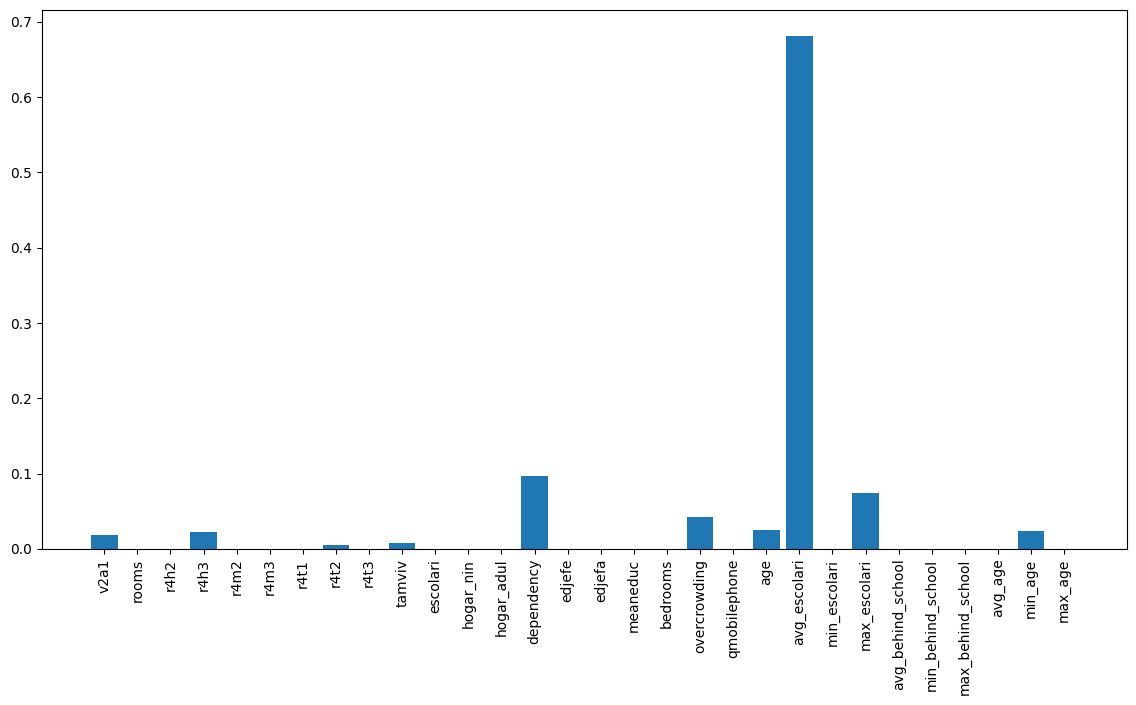

In [46]:
print(best_tree.feature_importances_)
print(best_tree.feature_names_in_)

importances_df = pd.DataFrame({"features" : best_tree.feature_names_in_, 
                               "importance" : best_tree.feature_importances_})
                             
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14, 7))
plt.bar(importances_df["features"],importances_df["importance"])
ax.tick_params(axis='x', labelsize=10, labelrotation=90)

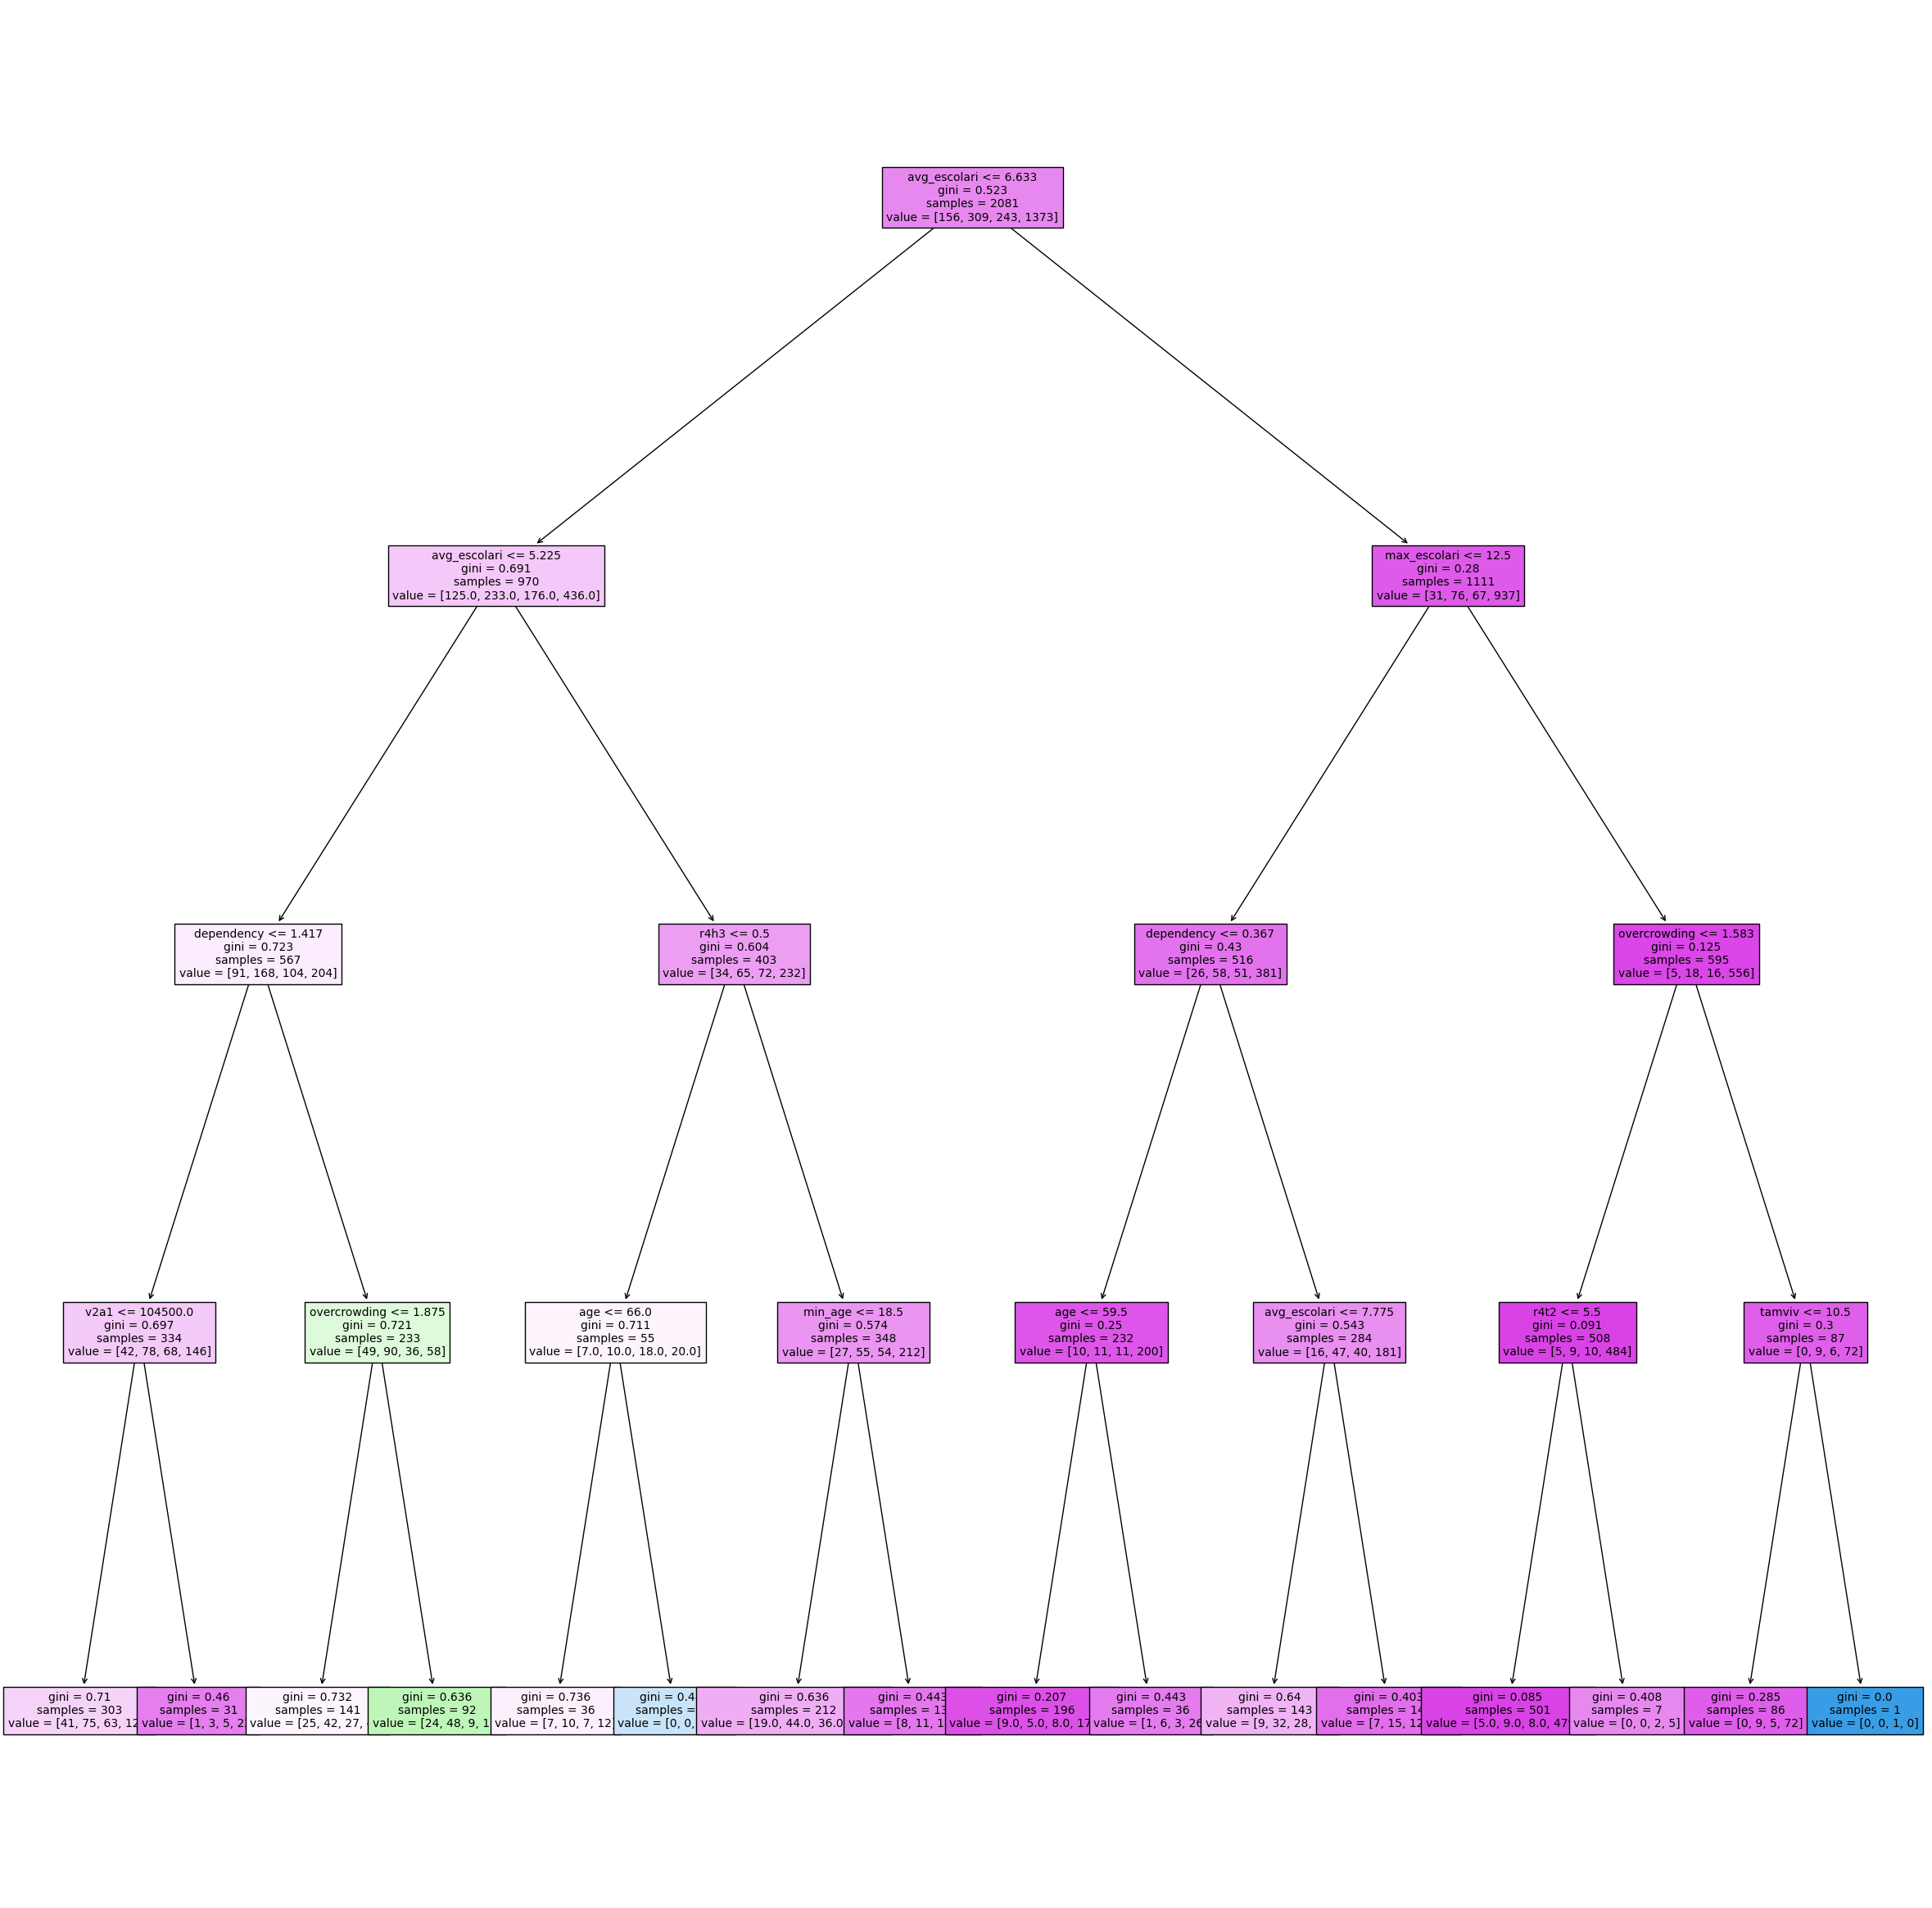

In [54]:
_, ax = plt.subplots(figsize=(30,30)) # Resize figure
tree.plot_tree(best_tree, filled=True, ax=ax, feature_names=best_tree.feature_names_in_, fontsize=10)
plt.show()

**Test Data**

In [47]:
x_test_knn = pd.DataFrame(imputer.fit_transform(x_test), columns=imputer.get_feature_names_out())
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train_knn, y_train)
y_pred = knn.predict_proba(x_test_knn)
roc_auc_score(y_test, y_pred, multi_class = "ovr", average = "micro")

0.8261111111111111

In [48]:
t = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4)
t.fit(x_train, y_train)
y_pred = t.predict_proba(x_test)
roc_auc_score(y_test, y_pred, multi_class = "ovr", average = "micro")

0.8889300411522634